In [1]:
import pandas as pd
import numpy as np

# read the dataset
df = pd.read_excel("mali.xlsx")

# delete the first 3 rows
df = df.iloc[3:]

# rename the columns
df.columns = ['Year',"GDP", "Inflation", "Unemployment"]

# save the new dataset
df.to_excel("mali_clean.xlsx")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

data = pd.read_excel('mali_clean.xlsx')

In [3]:
import pandas as pd

# Assuming you have a DataFrame named 'df' and the column name is 'year_column'
data['Year'] = df['Year'].apply(lambda x: int(x.split()[0]))


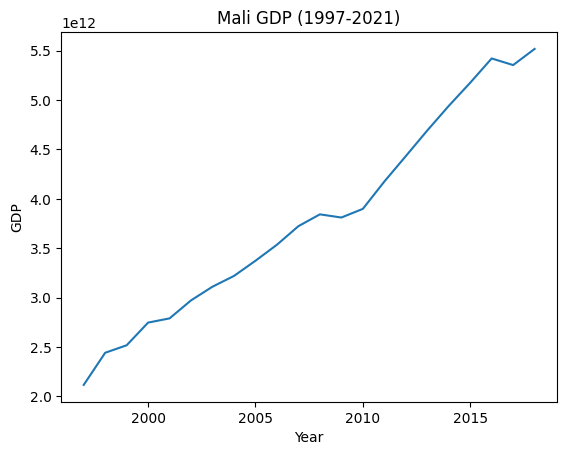

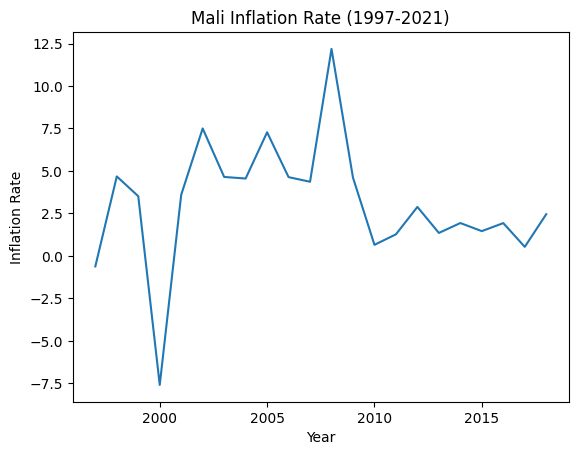

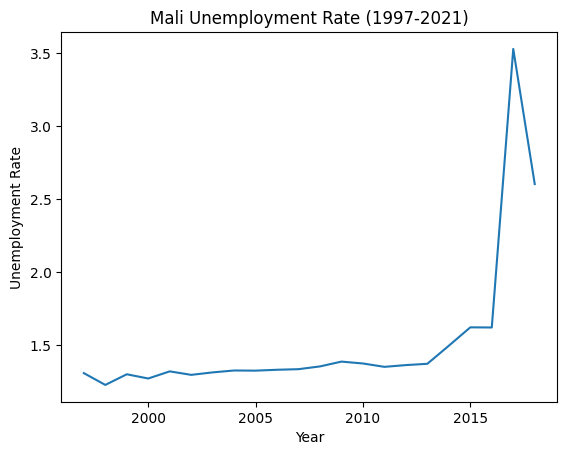

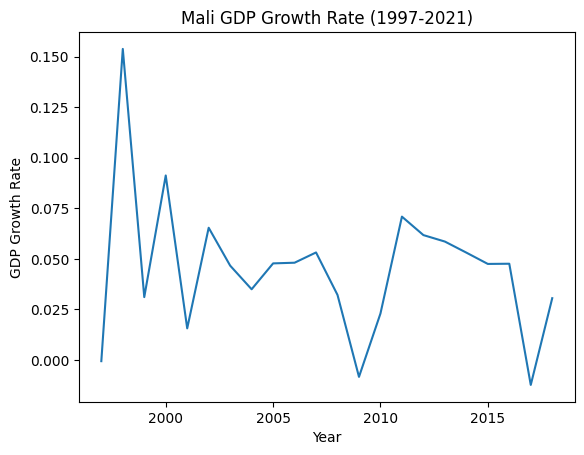

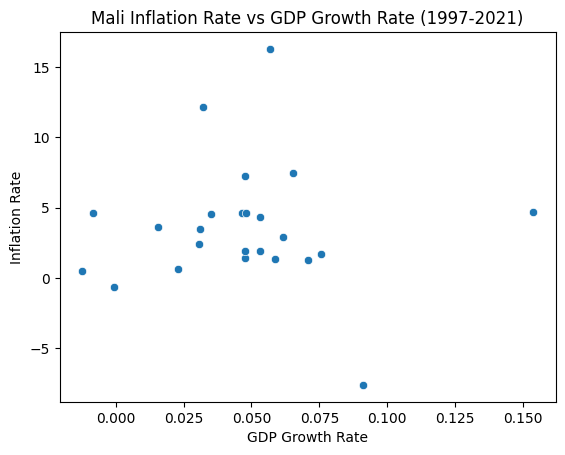

In [4]:
#2. plots

# Calculate GDP growth rate
data['GDP_growth'] = data['GDP'].pct_change()

# Plot GDP
plt.figure()
sns.lineplot(x='Year', y='GDP', data=data)
plt.title('Mali GDP (1997-2021)')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.savefig('GDP.png')

# Plot Inflation rate
plt.figure()
sns.lineplot(x='Year', y='Inflation', data=data)
plt.title('Mali Inflation Rate (1997-2021)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.savefig('Inflation.png')

# Plot Unemployment rate
plt.figure()
sns.lineplot(x='Year', y='Unemployment', data=data)
plt.title('Mali Unemployment Rate (1997-2021)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.savefig('Unemployment.png')

# Plot GDP growth rate
plt.figure()
sns.lineplot(x='Year', y='GDP_growth', data=data)
plt.title('Mali GDP Growth Rate (1997-2021)')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate')
plt.savefig('GDP_growth.png')

#Plot Inflation vs GDP growth
plt.figure()
sns.scatterplot(x='GDP_growth', y='Inflation', data=data)
plt.title('Mali Inflation Rate vs GDP Growth Rate (1997-2021)')
plt.xlabel('GDP Growth Rate')
plt.ylabel('Inflation Rate')
plt.savefig('Inflation_vs_GDP_growth.png')


In [5]:
#3. Estimate a and b coefficients in the modified Phillips Curve:

data['Inflation_diff'] = data['Inflation'].diff()

X = sm.add_constant(data['GDP'])
y = data['Inflation_diff']

# Drop the first row due to the NaN value from differencing
X = X.iloc[1:]
y = y.iloc[1:]

model = sm.OLS(y, X).fit()
print(model.summary())
a, b = model.params


                            OLS Regression Results                            
Dep. Variable:         Inflation_diff   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                   0.02121
Date:                Sun, 26 Mar 2023   Prob (F-statistic):              0.886
Time:                        16:03:12   Log-Likelihood:                -78.478
No. Observations:                  24   AIC:                             161.0
Df Residuals:                      22   BIC:                             163.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7966      4.772     -0.167      0.8

In [6]:
#4. Rearrange the equation and find α and natural level of output (Ȳ):

alpha = b
Y_natural = -a / b

print(f"Alpha: {alpha}")
print(f"Natural Level of Output: {Y_natural}")


Alpha: 1.818871284882045e-13
Natural Level of Output: 4379744201283.4717


In [7]:
#5. Estimate the Okun's Law coefficients:

data['Unemployment_diff'] = data['Unemployment'].diff()
data['GDP_growth'] = data['GDP'].pct_change()

X_okun = sm.add_constant(data['GDP_growth'])
y_okun = data['Unemployment_diff']

# Drop the first row due to the NaN value from differencing and percentage change
X_okun = X_okun.iloc[1:]
y_okun = y_okun.iloc[1:]

model_okun = sm.OLS(y_okun, X_okun).fit()
print(model_okun.summary())
a_okun, b_okun = model_okun.params


                            OLS Regression Results                            
Dep. Variable:      Unemployment_diff   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     2.669
Date:                Sun, 26 Mar 2023   Prob (F-statistic):              0.117
Time:                        16:03:12   Log-Likelihood:                -12.562
No. Observations:                  24   AIC:                             29.12
Df Residuals:                      22   BIC:                             31.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2546      0.150      1.701      0.1

In [8]:
#6. Rearrange the equation and find β and g for Okun's Law:

beta = -b_okun
g = -a_okun / b_okun

print(f"Beta: {beta}")
print(f"g: {g}")


Beta: 4.247322981356152
g: 0.059933964026938125
